In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf

Simulation of 2500 steps. 30 particles vs 30 MH steps in each Gibbs iteration.

In [3]:
import pickle

# Open the file in read-binary mode
with open("samples.pkl", "rb") as f:
    samples_dict = pickle.load(f)

# Now `samples_dict` contains the data from the saved file

In [4]:
A_csmc = samples_dict['A_csmc']
A_kalman = samples_dict['A_kalman']
A_carriero = samples_dict['A_carriero']
Pi_csmc = samples_dict['Pi_csmc']
Pi_kalman = samples_dict['Pi_kalman']
Pi_carriero = samples_dict['Pi_carriero']
phi_csmc = samples_dict['phi_csmc']
phi_kalman = samples_dict['phi_kalman']
phi_carriero = samples_dict['phi_carriero']
log_lambdas_csmc = samples_dict['log_lambdas_csmc']
log_lambdas_kalman = samples_dict['log_lambdas_kalman']
log_lambdas_carriero = samples_dict['log_lambdas_carriero']

In [5]:
N = A_csmc.shape[1]
T = log_lambdas_csmc.shape[2]
n_samples = 2500

In [20]:
log_lambdas_csmc.shape

(2500, 18, 646)

# compare inefficiency

In [6]:
def inefficiency(acf, n_samples):
    ess = len(acf) / (1 + 2 * np.sum(acf[1:]))
    ineff = n_samples/ess
    return ineff

In [8]:
csmc_inef = np.zeros((T,N))
kalman_inef = np.zeros((T,N))
carriero_inef = np.zeros((T,N))

for t in range(T):
  for n in range(N):
    csmc_inef[t,n] = inefficiency(acf(log_lambdas_csmc[:,n,t]), n_samples)
    kalman_inef[t,n] = inefficiency(acf(log_lambdas_kalman[:,n,t]), n_samples)
    carriero_inef[t,n] = inefficiency(acf(log_lambdas_carriero[:,n,t]), n_samples)

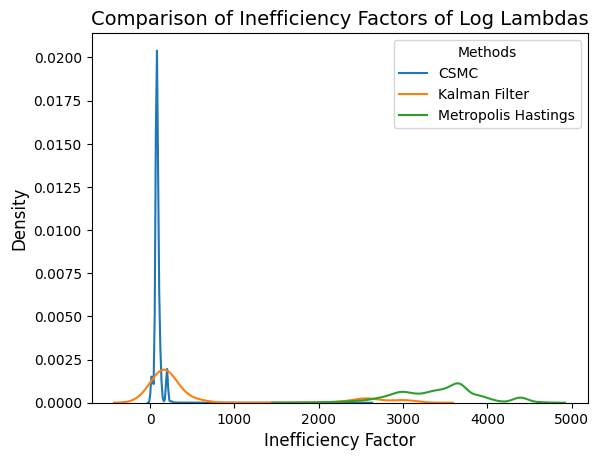

In [35]:
sns.kdeplot(csmc_inef.flatten(), label='CSMC')
sns.kdeplot(kalman_inef.flatten(), label='Kalman Filter')
sns.kdeplot(carriero_inef.flatten(), label='Metropolis Hastings')

plt.title('Comparison of Inefficiency Factors of Log Lambdas', fontsize=14)
plt.xlabel('Inefficiency Factor', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(title='Methods')

plt.show()


# compare mixing

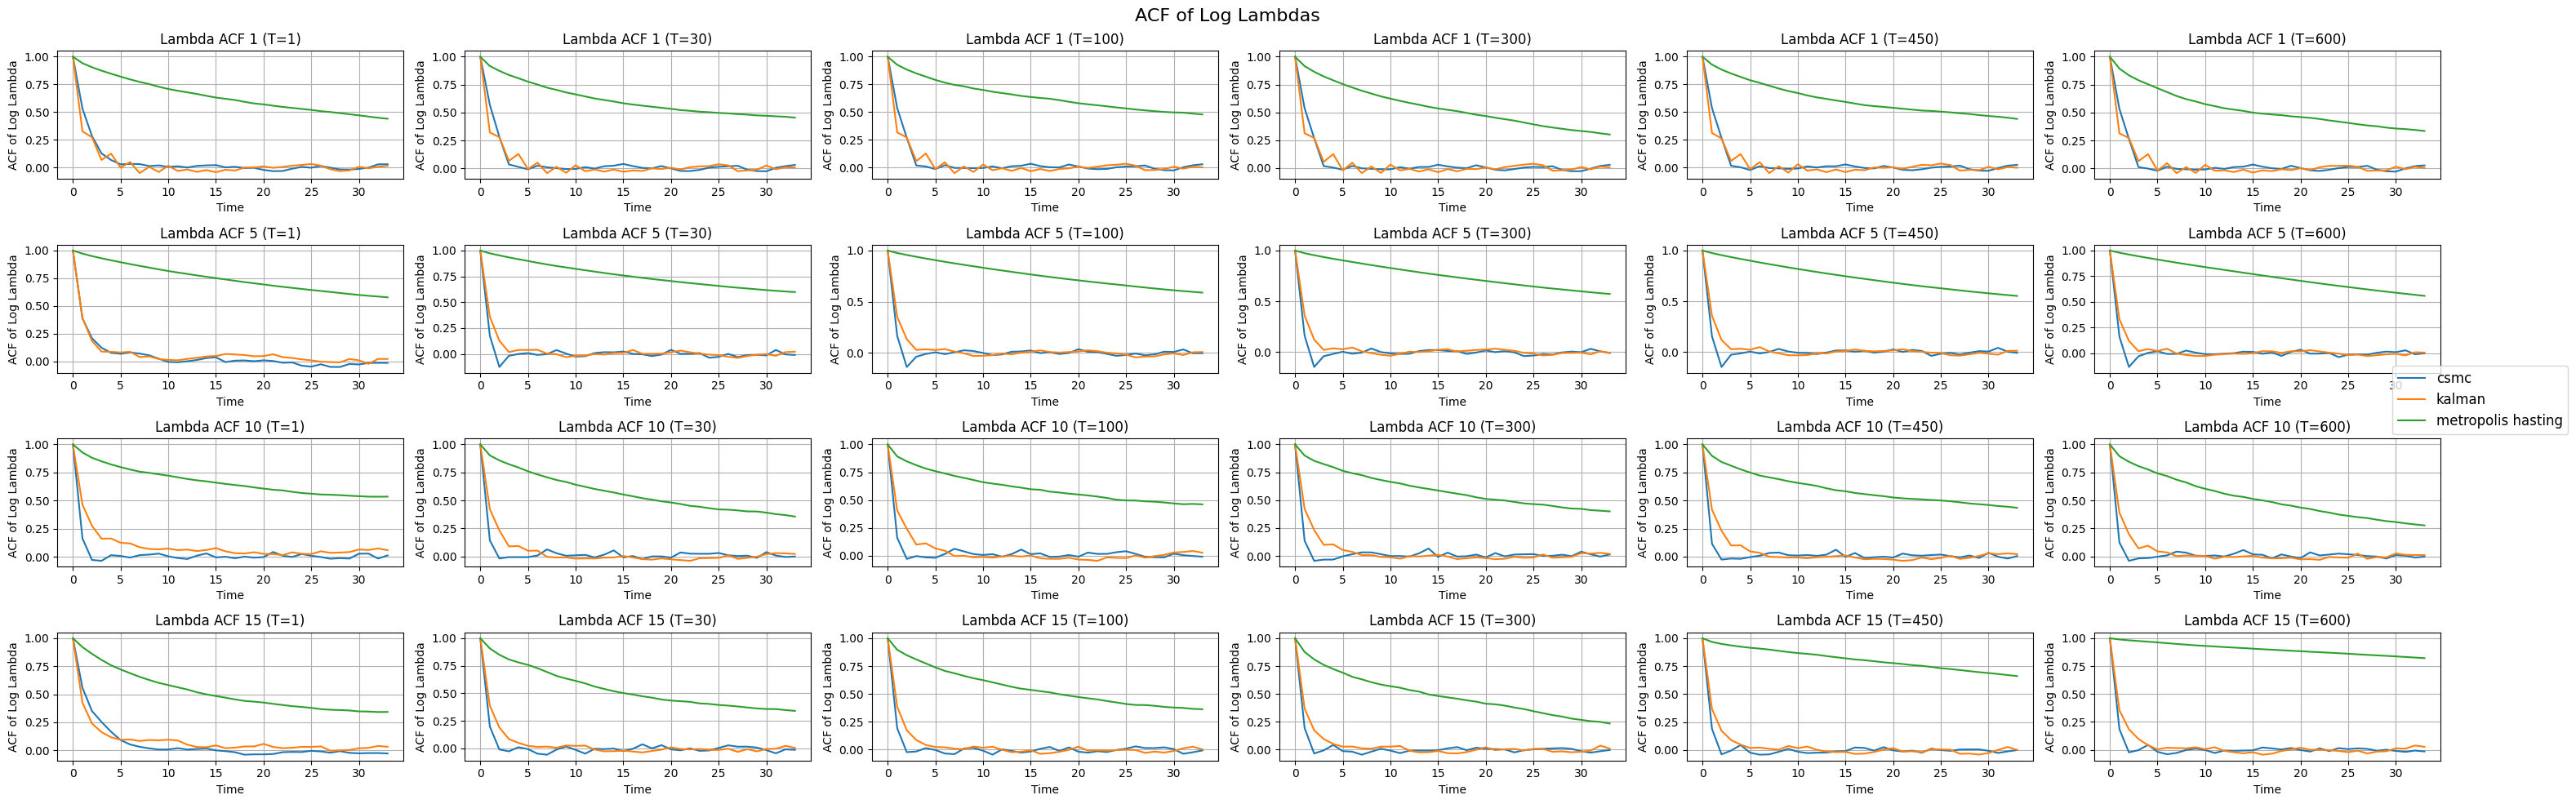

In [39]:
Ts = [1, 30, 100, 300, 450, 600]
Ns = [1,5,10,15]
fig, ax = plt.subplots(len(Ns), len(Ts), figsize=(30, 10))

# Create empty lists to hold the handles and labels for the legend
handles, labels = [], []

lag = 1000

for n, N in enumerate(Ns):
    for i, t in enumerate(Ts):
        acf_csmc = acf(log_lambdas_csmc[:, N, t-1], lag)
        acf_kalman = acf(log_lambdas_kalman[:, N, t-1], lag)
        acf_carriero = acf(log_lambdas_carriero[:, N, t-1], lag)
        line_csmc, = ax[n, i].plot(acf_csmc[:lag], label='csmc', linewidth=1.5)
        line_kalman, = ax[n, i].plot(acf_kalman[:lag], label='kalman', linewidth=1.5)
        line_carriero, = ax[n, i].plot(acf_carriero[:lag], label='metropolis hasting', linewidth=1.5)

        ax[n, i].set_xlabel('Time', fontsize=10)
        ax[n, i].set_ylabel('ACF of Log Lambda', fontsize=10)
        ax[n, i].set_title(f'Lambda ACF {N} (T={t})', fontsize=12)

        # Adding grid for better readability
        ax[n, i].grid(True)

        # Add the handles and labels for the legend
        if n == 0 and i == 0:  # Only add the handles once
            handles.append(line_csmc)
            handles.append(line_kalman)
            handles.append(line_carriero)
            labels.append('csmc')
            labels.append('kalman')
            labels.append('metropolis hasting')

# Add a big title to the whole plot
fig.suptitle('ACF of Log Lambdas', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Add the single legend outside the plot
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05, 0.5), fontsize=12)

plt.show()

In [14]:
acf_csmc.shape

(34,)

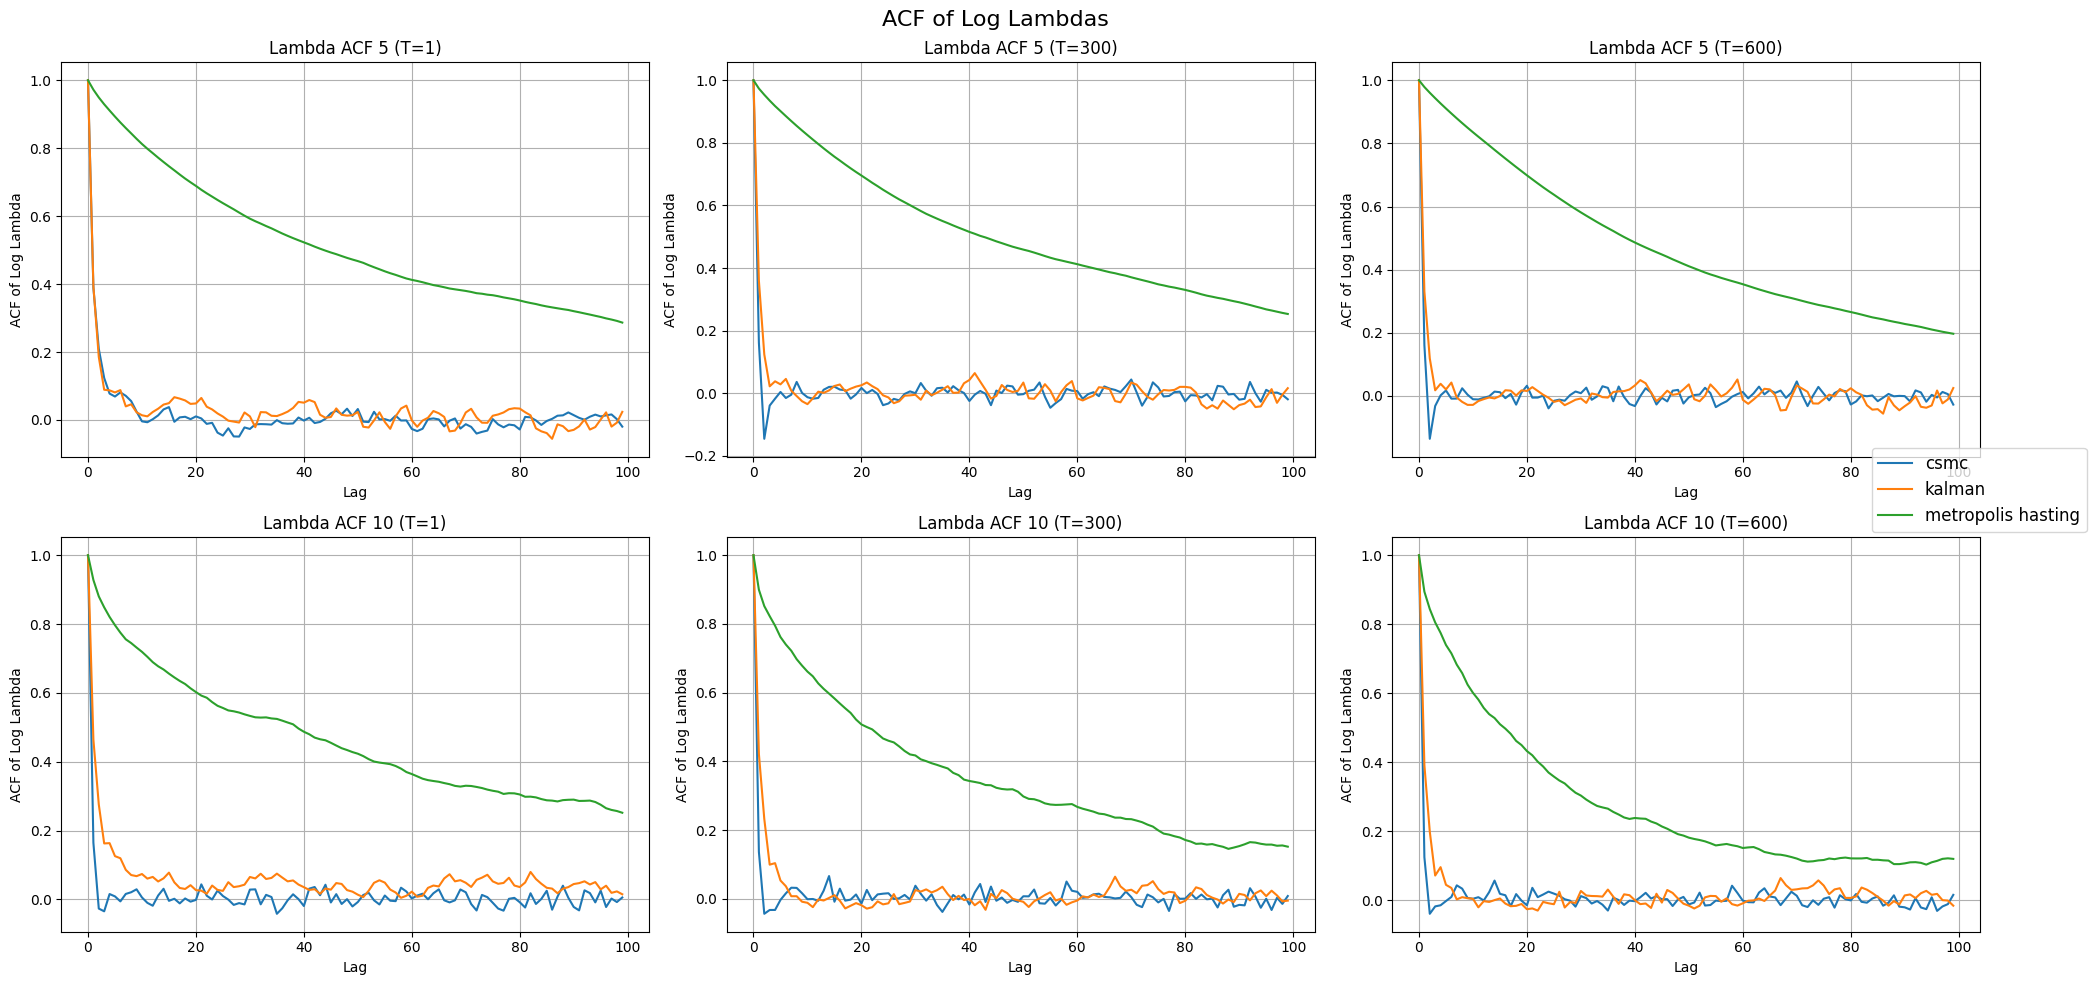

In [16]:
Ts = [1,300,600]
Ns = [5,10]
fig, ax = plt.subplots(len(Ns), len(Ts), figsize=(20, 10))

# Create empty lists to hold the handles and labels for the legend
handles, labels = [], []

lag = 100
lags = np.arange(lag)

for n, N in enumerate(Ns):
    for i, t in enumerate(Ts):
        acf_csmc = acf(log_lambdas_csmc[:, N, t-1], nlags=lag)
        acf_kalman = acf(log_lambdas_kalman[:, N, t-1], nlags=lag)
        acf_carriero = acf(log_lambdas_carriero[:, N, t-1], nlags=lag)
        line_csmc, = ax[n, i].plot(lags,acf_csmc[:lag], label='csmc', linewidth=1.5)
        line_kalman, = ax[n, i].plot(lags,acf_kalman[:lag], label='kalman', linewidth=1.5)
        line_carriero, = ax[n, i].plot(lags,acf_carriero[:lag], label='metropolis hasting', linewidth=1.5)

        ax[n, i].set_xlabel('Lag', fontsize=10)
        ax[n, i].set_ylabel('ACF of Log Lambda', fontsize=10)
        ax[n, i].set_title(f'Lambda ACF {N} (T={t})', fontsize=12)

        # Adding grid for better readability
        ax[n, i].grid(True)

        # Add the handles and labels for the legend
        if n == 0 and i == 0:  # Only add the handles once
            handles.append(line_csmc)
            handles.append(line_kalman)
            handles.append(line_carriero)
            labels.append('csmc')
            labels.append('kalman')
            labels.append('metropolis hasting')

# Add a big title to the whole plot
fig.suptitle('ACF of Log Lambdas', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Add the single legend outside the plot
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05, 0.5), fontsize=12)

plt.show()

plot trace

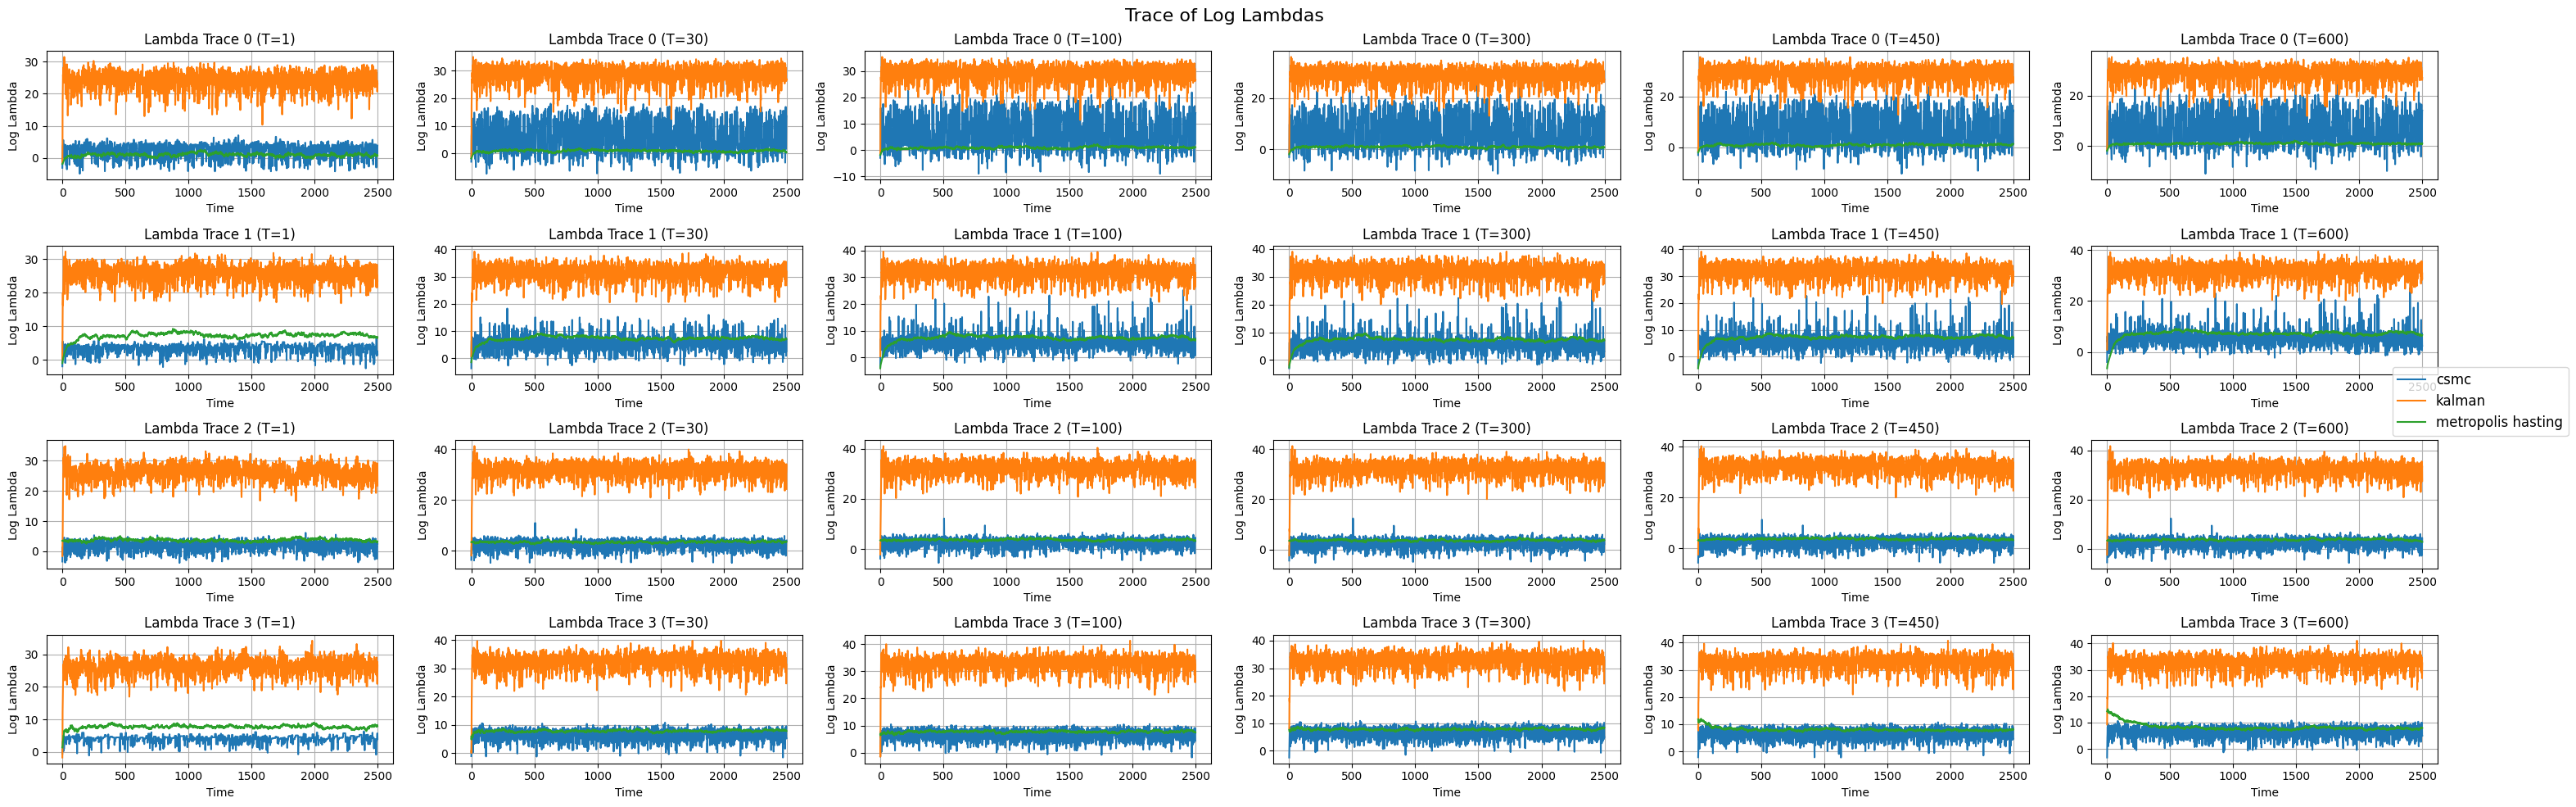

In [41]:
fig, ax = plt.subplots(len(Ns), len(Ts), figsize=(30, 10))

# Create empty lists to hold the handles and labels for the legend
handles, labels = [], []

for n, N in enumerate(Ns):
    for i, t in enumerate(Ts):
        line_csmc, = ax[n, i].plot(log_lambdas_csmc[:, N, t-1], label='csmc', linewidth=1.5)
        line_kalman, = ax[n, i].plot(log_lambdas_kalman[:, N, t-1], label='kalman', linewidth=1.5)
        line_carriero, = ax[n, i].plot(log_lambdas_carriero[:, N, t-1], label='metropolis hasting', linewidth=1.5)

        ax[n, i].set_xlabel('Time', fontsize=10)
        ax[n, i].set_ylabel('Log Lambda', fontsize=10)
        ax[n, i].set_title(f'Lambda Trace {n} (T={t})', fontsize=12)

        # Adding grid for better readability
        ax[n, i].grid(True)

        # Add the handles and labels for the legend
        if n == 0 and i == 0:  # Only add the handles once
            handles.append(line_csmc)
            handles.append(line_kalman)
            handles.append(line_carriero)
            labels.append('csmc')
            labels.append('kalman')
            labels.append('metropolis hasting')

# Add a big title to the whole plot
fig.suptitle('Trace of Log Lambdas', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Add the single legend outside the plot
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05, 0.5), fontsize=12)

plt.show()

#